<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/MAT422_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVC

# MAT 422 - Ivan Matyushov

# SVC of TGA data to predict certain categories
df = pd.read_csv('all_sets_tga_csv.csv')


def shuffle_df(df):
  return df.sample(frac=1).reset_index(drop=True)

df1 = shuffle_df(df) #Shuffling the data of df
print(df1)

new_df = df1.loc[:, ['Temp', 'Mass perc', 'perc_loss', 'p_time', 'wash']]
nrows = math.floor(new_df.shape[0] * 0.75) #partition data to train on 75% of data points

training = new_df.loc[:nrows]
test = new_df.loc[nrows:]



#print(training) #One can see there are 25 training entries
#print(test) #One can see there are 75 testing entries

model = SVC()
model.fit(training[["Mass perc", "perc_loss", 'p_time', 'wash']], training["Temp"])

predict = model.predict(test[["Mass perc", "perc_loss", "p_time", "wash"]]) #predict models from rest of data set




    Sample  Temp  Mass perc  p_time  p_temp  perc_loss  wash
0        3  1000   59.26725      40     450      3.862     0
1        6  1000   56.00446      20     450      4.154     1
2        7     0  100.00000      40     450      0.000     1
3        6     0  100.00000      20     450      0.000     1
4       11   220   90.16701      40     600      9.833     0
..     ...   ...        ...     ...     ...        ...   ...
94      13   900   49.26318      10     600     38.335     1
95      16  1000   73.49411      60     600      2.867     1
96      14     0  100.00000      20     600      0.000     1
97       1   400   79.89459      10     450      7.608     0
98       8   900   13.39272      60     450     21.823     1

[99 rows x 7 columns]


In [15]:
accu = sum(test["Temp"] == predict) / test.shape[0] #compares accuracy of predictions

compare = pd.DataFrame({'Column1': test['Mass perc'], 'Column2': test['perc_loss'],
                        'Column3': test['p_time'], 'Column4': test['wash'],
                        'Column5': test['Temp'], 'Column6': predict})
compare.columns = ['Mass %', '% Loss', 'Pyrol. Time', 'DI/Acid', 'Old Temp.', 'Prediction']
print(compare)
print(accu)

       Mass %  % Loss  Pyrol. Time  DI/Acid  Old Temp.  Prediction
74   60.54762   5.491           40        1       1000        1000
75   60.30823   1.831           10        1       1000        1000
76   92.74227   0.589           60        1        315           0
77   63.12968  25.416           40        0        900         900
78   89.36954   2.023           40        1        315         400
79   36.46825   7.619           20        0       1000        1000
80  100.00000   0.000           20        0          0         400
81   68.71961  19.877           60        0        900         900
82   91.79500   0.947           60        1        400         400
83   70.74518  20.776           20        1        900         900
84   42.57860   7.365           10        0       1000        1000
85  100.00000   0.000           10        0          0         400
86   92.67370   7.326           60        0        220         400
87   90.84124   1.457           10        1        315        

Using just mass % and percent loss got accuracy of 0.36.

Using mass %, % loss, pyrolysis time, and pyrolysis temp got accuracy of 0.12.

Adding in pyrolysis time gave me an accuracy of 0.40.

Attemped to shuffle data - still got same accuracy of 0.40.

Added in column of type of wash: DI(0) or Acid(1), accuracy of 0.44.

After shuffling and adding back pyrolysis temperature, accuracy fell to 0.12.

After several iterations, the shuffling shifts the accuracy also between 0.36, 0.44, and 0.48.

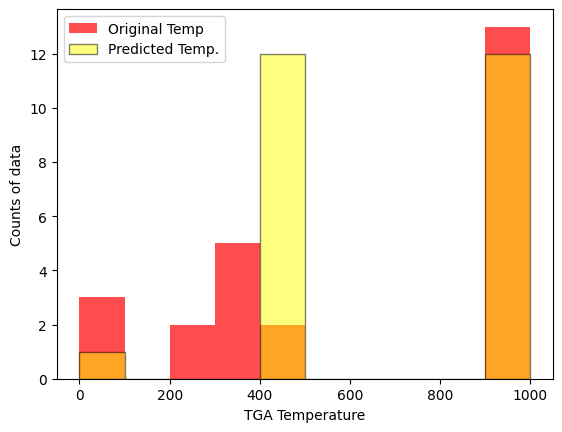

In [16]:
#Plotting on scatter plot to compare

data1 = test['Temp']
data2 = predict
# Create the figure and axes
fig, ax = plt.subplots()

# Plot the histograms
plt.hist(data1, label='Original Temp', alpha=.7, color='red')

# plotting second histogram
plt.hist(data2, label="Predicted Temp.", alpha=.5,
         edgecolor='black', color='yellow')
plt.legend()

plt.xlabel('TGA Temperature')
plt.ylabel('Counts of data')
# Showing the plot using plt.show()
plt.show()

From the above histogram comparing the spread of data points between the original points tested on and the points predicted, the accuracy can be made more visual. The SVM seems to be better at predicting the extreme of when the given points are likely at 900 or 1000 C. It gets blurry with data points in the 220-400 C range. This makes sense as these temperature points are close together and sit at areas where the TGA plots tend to shift more wildly. It will guess a couple mid points correctly but will often primarily guess one or two numbers very frequently. These onsets can come earlier or later depending on the material tested. Likely more data and spread out points is needed for good analysis.  

MSE: 17.13952223012711 R2: 0.9707806247916075


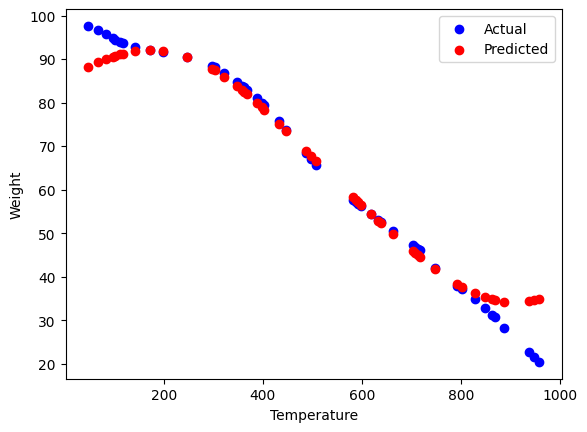

In [17]:
# Seeing if SVRs can predict TGA data

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df2 = pd.read_csv('set1_temp_mass.csv')

# Example data
new_df1 = df2.loc[:, ['Temp', 'Mass perc']]

x = new_df1['Temp']
y = new_df1['Mass perc']

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train.ravel())

#print(X_test)
#print(y_test)

# SVR model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = svr.predict(X_test)

#print(y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse, "R2:", r2)
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('Temperature')
plt.ylabel('Weight')
plt.legend()
plt.show()


[90.16474708 90.14434211 90.12023031 90.09858811 90.07281907 90.04598199
 90.01241344 89.98582907 89.96056484 89.93701487 89.91339717 89.8889405
 89.86454231 89.84062219 89.81688699 89.78996353 89.76490652 89.74047033
 89.71770653 89.69124618 89.66567796 89.64239488 89.61799894 89.59397495
 89.56850723 89.54876047 89.52267316 89.49990686 89.47640266]
MSE: 4373.296345662121 R2: -202.31480145823005


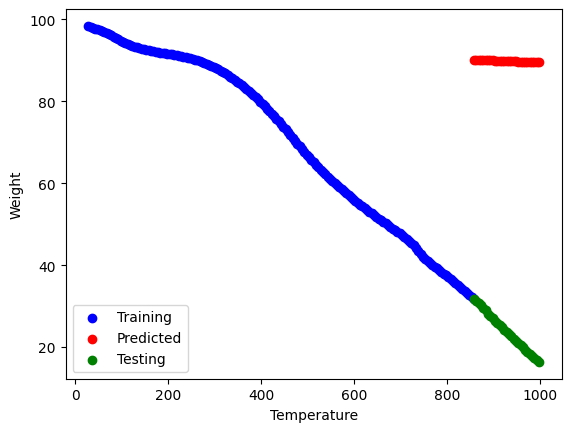

In [5]:
# Seeing if SVRs can predict the final portions of TGA data

x_t = new_df1.loc[1:167, 'Temp']
y_t = new_df1.loc[1:167, 'Mass perc']


x_test = new_df1.loc[167:197, 'Temp']
y_test = new_df1.loc[167:197, 'Mass perc']

x_t = x_t.values.reshape(-1,1)
y_t = y_t.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_t, y_t.ravel())

# SVR model
from sklearn.metrics import mean_squared_error, r2_score
y_pred1 = svr.predict(y_test)

print(y_pred1)


#print(y_pred1)

mse1 = mean_squared_error(y_test, y_pred1)
r_sqr = r2_score(y_test, y_pred1)

print("MSE:", mse1, "R2:", r_sqr)
plt.scatter(x_t, y_t, label='Training', color='blue')
plt.scatter(x_test, y_pred1, label='Predicted', color='red')
plt.scatter(x_test, y_test, label='Testing', color='green')
plt.xlabel('Temperature')
plt.ylabel('Weight')
plt.legend()
plt.show()

       Temp
1    27.539
2    32.539
3    37.539
4    42.539
5    47.539
..      ...
586  30.378
587  35.378
588  40.378
589  45.378
590  50.378

[590 rows x 1 columns]
        Temp
590   50.378
591   55.378
592   60.378
593   65.378
594   70.378
..       ...
775  975.378
776  980.378
777  985.378
778  990.378
779  995.378

[190 rows x 1 columns]
MSE: 269.07547823756784 R2: -1.8336113756995176


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


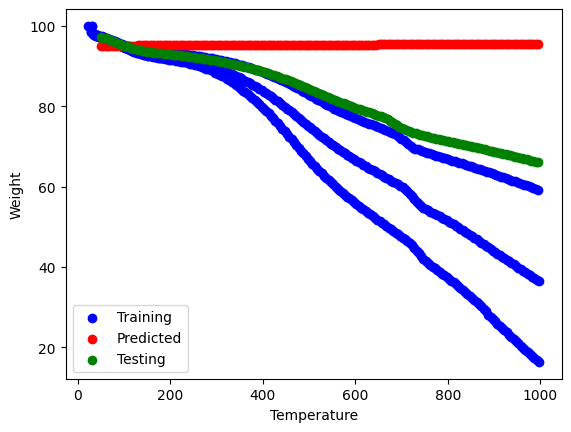

In [10]:
# Attempting SVR use to predict the 4th TGA plot given the first three plots
new_df2 = pd.read_csv('allsets_temp_perc_csv.csv')

x_t1 = new_df2.loc[1:590, ['Temp']]
y_t1 = new_df2.loc[1:590, 'Mass perc']

print(x_t1)

x_test1 = new_df2.loc[590:781, ['Temp']]
y_test1 = new_df2.loc[590:781, 'Mass perc']

print(x_test1)

#x_t1 = x_t1.values.reshape(-1,1)
y_t1 = y_t1.values.reshape(-1,1)
#x_test1 = x_test1.values.reshape(-1,1)
y_test1 = y_test1.values.reshape(-1,1)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_t1, y_t1.ravel())

# SVR model
from sklearn.metrics import mean_squared_error, r2_score
y_pred2 = svr.predict(y_test1)

mse2 = mean_squared_error(y_test1, y_pred2)
r_sqr2 = r2_score(y_test1, y_pred2)

print("MSE:", mse2, "R2:", r_sqr2)
plt.scatter(x_t1, y_t1, label='Training', color='blue')
plt.scatter(x_test1, y_pred2, label='Predicted', color='red')
plt.scatter(x_test1, y_test1, label='Testing', color='green')
plt.xlabel('Temperature')
plt.ylabel('Weight')
plt.legend()
plt.show()